### 학습목표
- 데이터 탐색을 위한 기술통계 분석을 실습하기

#### 데이터 분석 (머신러닝)의 7과정
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. EDA (탐색적 데이터 분석) -> 기술통계량 확인
5. 모델 선택 및 하이퍼 파라미터 조절
6. 모델 학습
7. 모델 평가

In [2]:
import pandas as pd

In [3]:
# HR 데이터를 활용하여 데이터 탐색
# HR 데이터 불러오기
hr_info = pd.read_csv('data/hr-info.csv', encoding='EUC-KR')
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [4]:
# 기술통계량 확인 -> 수치데이터의 기본적인 통계수치를 보여준다.
hr_info.describe() # 기술하다의 '기술'
# count: 데이터의 개수
# mean: 평균
# std: 표준편차 (평균에서 값들이 떨어져있는 정도) -> 분산에 루트를 씌운 값
# min: 최솟값
# 25%, 50%, 75% : 사분위수
# -> 데이터를 오름차순 정렬 후 순서대로 25%, 50%(중위수), 75%, 에 위치해있는 값
# 사분위수를 통해 데이터의 전체적인 분포를 확인

,AGE,SERVICE_YEAR,PERFORMANCE_SCORE,SALARY,TRAINING_HOURS
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,31.930000,4.660000,1.919900,5987.000000,34.745000
std,7.111114,6.183492,1.748062,1182.676889,40.470971
min,22.000000,0.000000,0.000000,4500.000000,0.000000
25%,27.000000,0.000000,0.000000,5000.000000,4.000000
50%,30.000000,1.000000,1.795000,5600.000000,21.000000
75%,37.000000,8.000000,3.412500,6825.000000,56.750000
max,49.000000,25.000000,4.960000,10200.000000,240.000000


In [5]:
[1,6,10,12,12,15,21,22,33,37,56]
print((10+12)/2)      # 1사분위수
print(15)             # 2사분위수
print((22+33)/2)      # 3사분위수

# 최소 이상치 : 3사분위수 - 1.5 * 1사분위수
# 최대 이상치 : 1사분위수 - 1.5 * 3사분위수

11.0
15
27.5


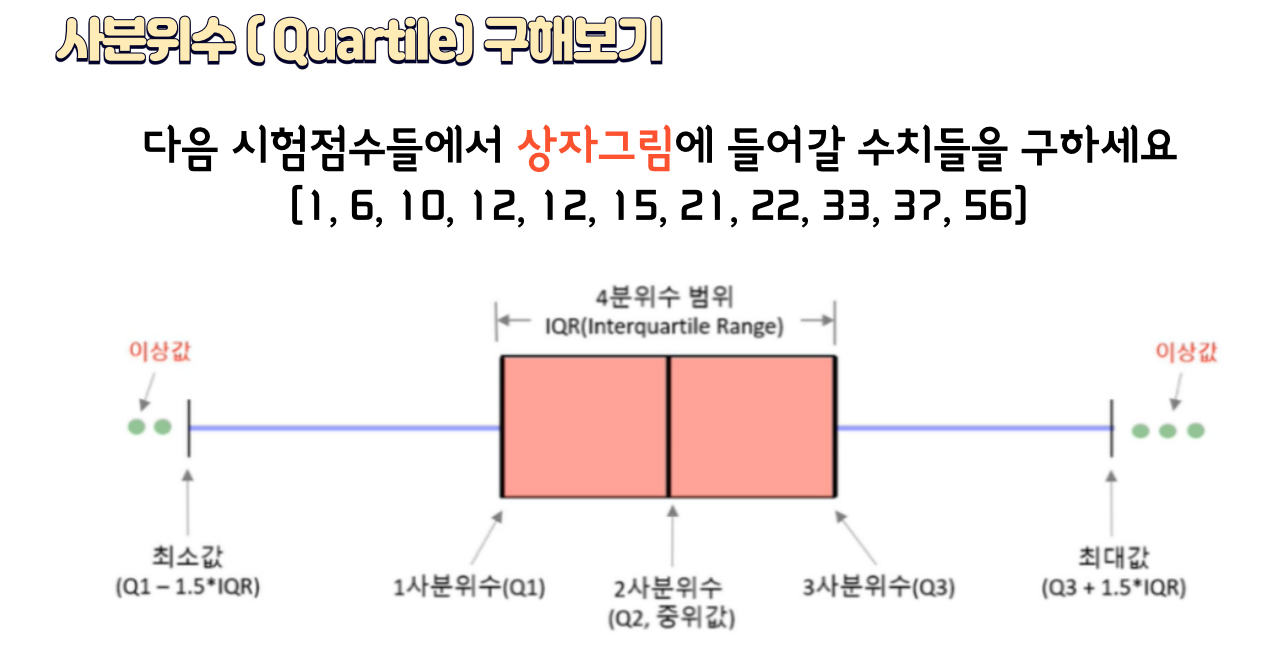
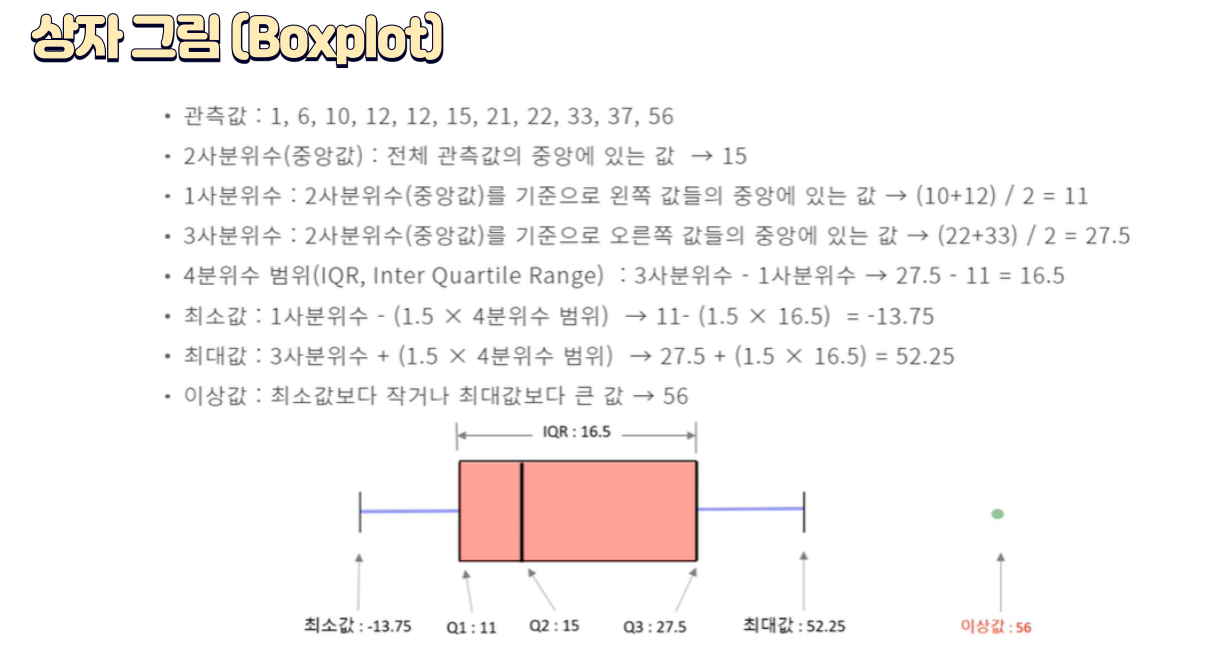
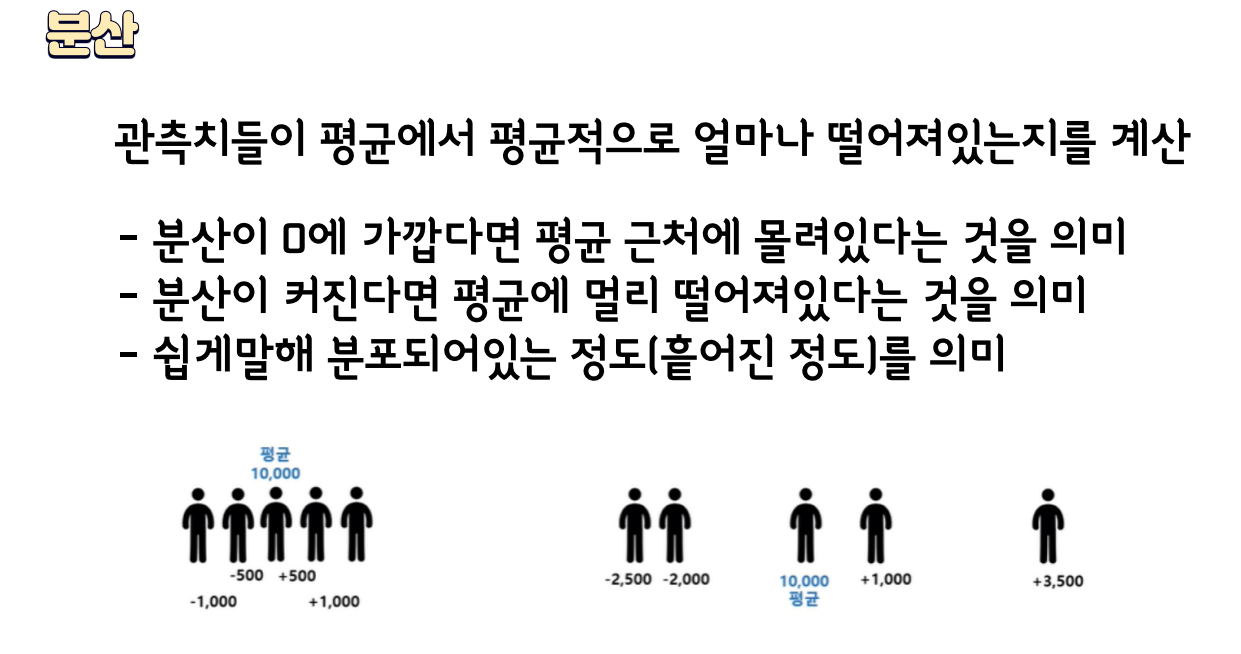
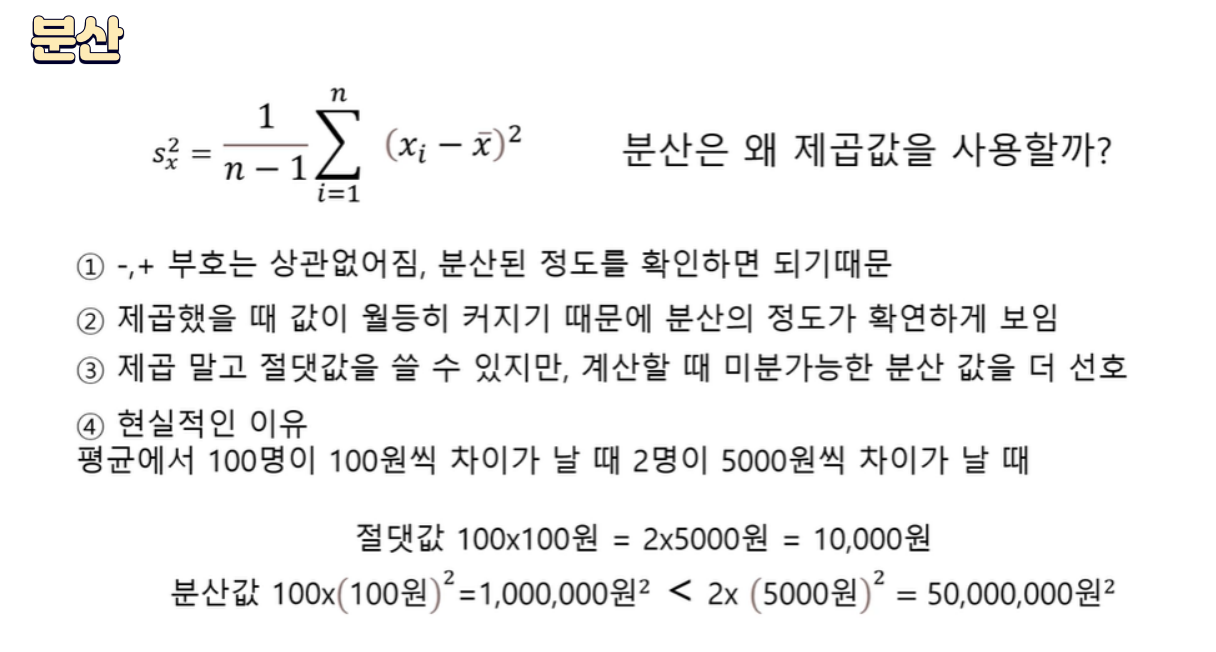
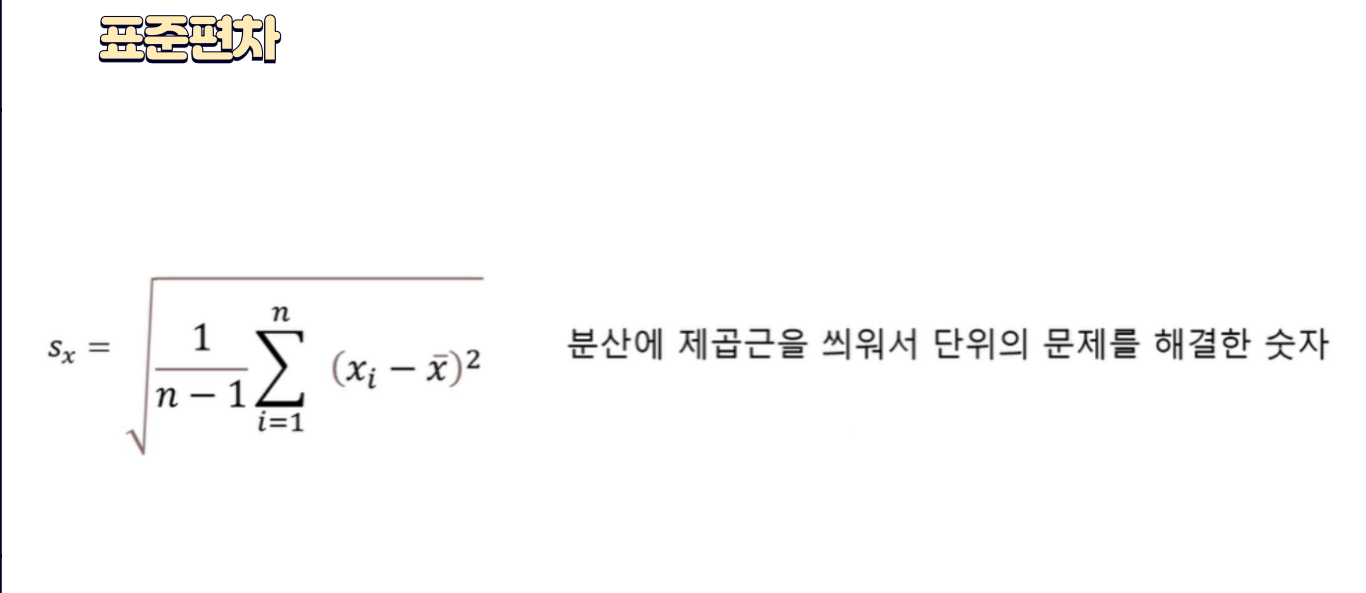

In [7]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

In [8]:
# object(문자열) 타입의 기술통계랑 확인
hr_info.describe(include=['object'])
# count : 데이터의 개수
# unqiue: 중복없이 유일한 값 의 개수
# top : 유일한 값들 -> 카테고리들 중 가장 많이 등장한 값
# freq: frequency 빈도수 -> top 값이 나온 빈도수

,EID,ENAME,GENDER,ORG_CD,POS_CD,EDU_LEVEL,LAST_PROMO_DT,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
count,200,200,200,197,200,200,182,200,200,200,49,49,49,200,200
unique,200,200,2,30,9,5,4,91,2,16,8,6,2,6,2
top,E00206,시이오,M,ORG021,P008,학사 학위,2024-03-01,Salesforce,Y,2024-03-01,2024-03-01,이직,N,KOREA,Y
freq,1,1,117,12,55,159,111,24,151,64,19,28,45,102,150


### 범용함수
- .sum() : 합계를 구할 때 사용
- .mean() : 평균을 구할 때 사용
- .count() : 데이터의 개수를 셀 때 사용 (값이 있을때 카운팅)
- .value_counts() : 각 값의 개수를 셀 때 사용
- .unique() : 중복없이 유일한 값들을 출력할때 사용
- .min() : 최솟값
- .max() : 최댓값

In [10]:
# 성별데이터의 개수 확인 -> .count()
hr_info['GENDER'].count()

200

In [11]:
# 성별 데이터 값의 개수 확인 -> .value_counts()
hr_info['GENDER'].value_counts()

GENDER
M    117
F     83
Name: count, dtype: int64

In [12]:
# 직원들의 국적(NATION) 종류를 출력하기
hr_info['NATION'].unique()

array(['KOREA', 'Japan', 'USA', 'India', 'China', 'UK'], dtype=object)

In [13]:
# 최대 근속년수, 최소 근속년수 확인
print(f"최대 근속 년수 : {hr_info['SERVICE_YEAR'].max()}")
print(f"최소 근속 년수 : {hr_info['SERVICE_YEAR'].max()}")

최대 근속 년수 : 25
최소 근속 년수 : 25


In [14]:
# 평균 근속년수, 중앙값을 활용한 근속년수 확린
print(f"최대 근속 년수 : {hr_info['SERVICE_YEAR'].mean()}")
print(f"중앙값 근속 년수 : {hr_info['SERVICE_YEAR'].median()}")

최대 근속 년수 : 4.66
중앙값 근속 년수 : 1.0


- 교육수준에 따른 평균 연봉을 알아보기

In [16]:
# 교육 수준이 박사 학위 인 직원의 평균연봉 확인
emp = hr_info[hr_info['EDU_LEVEL']=='박사 학위']
emp['SALARY'].mean()

8166.666666666667

In [17]:
# 반복문을 활용해서 전체 교육수준에 따른 연봉 출력
for edu_lv in hr_info['EDU_LEVEL'].unique():
    emp = hr_info[hr_info['EDU_LEVEL'] == edu_lv]
    print(
        f"{edu_lv} : {emp['SALARY'].mean().round()}"
    )

박사 학위 : 8167.0
학사 학위 : 5727.0
석사 학위 : 6900.0
고등학교 졸업 : 6140.0
전문대 학위 : 5050.0


### 데이터 그룹화를 통한 통계분석

In [19]:
# 연봉, 교육수준에 따른 평균값
hr_info[['SALARY','EDU_LEVEL']].groupby(by = 'EDU_LEVEL').mean()

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


In [20]:
# 두개 이상의 기준을 가지고 그룹화
# 교육 수준밒 성별에 따른 평균연봉 확인
hr_info[['SALARY','EDU_LEVEL','GENDER']].groupby(by = ['EDU_LEVEL','GENDER']).mean()

SALARY
EDU_LEVEL GENDER             
고등학교 졸업   F       6200.000000
          M       6100.000000
박사 학위     F       8425.000000
          M       8037.500000
석사 학위     F       7233.333333
          M       6525.000000
전문대 학위    F       5600.000000
          M       4500.000000
학사 학위     F       5643.076923
          M       5785.106383

In [21]:
hr_info[['SALARY','GENDER']].groupby(by = 'GENDER').mean()

,SALARY
GENDER,
F,5975.903614
M,5994.871795


In [22]:
# 교육수준별 평균 나이 구하기
hr_info[['AGE','EDU_LEVEL']].groupby(by = 'EDU_LEVEL').mean()

,AGE
EDU_LEVEL,
고등학교 졸업,33.100000
박사 학위,43.333333
석사 학위,37.294118
전문대 학위,26.000000
학사 학위,30.496855


In [54]:
hr_info[['EDU_LEVEL','AGE']].groupby(by="EDU_LEVEL")

In [23]:
# 두개의 결과값을 출력
# 그룹화한 카테고리 이름, 그룹화한 결과(DataFrame)
for idx, df in hr_info[['EDU_LEVEL','AGE']].groupby(by="EDU_LEVEL"):
    display(idx)
    display(df)

'고등학교 졸업'

,EDU_LEVEL,AGE
11,고등학교 졸업,48
18,고등학교 졸업,41
25,고등학교 졸업,41
57,고등학교 졸업,37
68,고등학교 졸업,38
87,고등학교 졸업,30
108,고등학교 졸업,30
185,고등학교 졸업,22
188,고등학교 졸업,22
190,고등학교 졸업,22


'박사 학위'

,EDU_LEVEL,AGE
0,박사 학위,49
1,박사 학위,49
2,박사 학위,48
3,박사 학위,47
4,박사 학위,47
10,박사 학위,48
13,박사 학위,48
17,박사 학위,41
19,박사 학위,40
51,박사 학위,36


'석사 학위'

,EDU_LEVEL,AGE
6,석사 학위,47
7,석사 학위,47
12,석사 학위,48
15,석사 학위,42
16,석사 학위,41
20,석사 학위,40
22,석사 학위,40
42,석사 학위,35
45,석사 학위,36
49,석사 학위,36


'전문대 학위'

,EDU_LEVEL,AGE
107,전문대 학위,30
189,전문대 학위,22


'학사 학위'

,EDU_LEVEL,AGE
5,학사 학위,47
8,학사 학위,48
9,학사 학위,48
14,학사 학위,48
21,학사 학위,40
...,...,...
195,학사 학위,23
196,학사 학위,23
197,학사 학위,23
198,학사 학위,24


### 그룹화 후 여러가지의 통계값 확인
- agg()

In [25]:
hr_info[['SALARY','EDU_LEVEL']].groupby(by = 'EDU_LEVEL').agg(['mean', 'max', 'min', 'median'])

SALARY                     
                  mean    max   min  median
EDU_LEVEL                                  
고등학교 졸업    6140.000000   8500  4500  6250.0
박사 학위      8166.666667  10200  5800  8500.0
석사 학위      6900.000000   8600  5100  7000.0
전문대 학위     5050.000000   5600  4500  5050.0
학사 학위      5727.044025   8500  4500  5600.0

### 그룹화 후 컬럼별로 다른 연산결과 확인

In [27]:
# 국적에 따른 평균 성과평가점수와 최대연봉 확인하기
# PERFORMANCE_SCORE -> 평균 mean
# SALARY -> 최대값 max
hr_info.groupby(by = 'NATION').agg({'PERFORMANCE_SCORE':'mean', 'SALARY':'max'})

,PERFORMANCE_SCORE,SALARY
NATION,,
China,2.550000,7400
India,1.854545,8300
Japan,2.672381,8600
KOREA,1.461765,10200
UK,2.692778,7300
USA,2.329091,8500


### 상관계수 분석
- 두 변수 사이의 관계를 수치화하여 확인하는 방법
- -1~1 사이의 값을 가진다.
- -1 에 가까울수록 음의 상관관계
   - 예시: 다이어트 의지(x)가 커질수록 체중(y) 감소
- 1에 가까울수록 양의 상관관계
   - 예시 : 식욕(x)이 커질수록 체중(y) 증가
- 음수값이라고 해서 상관관계가 없는것이 아니라 절댓값이 0에 아까울수록 관련이 없는 변수들이다.


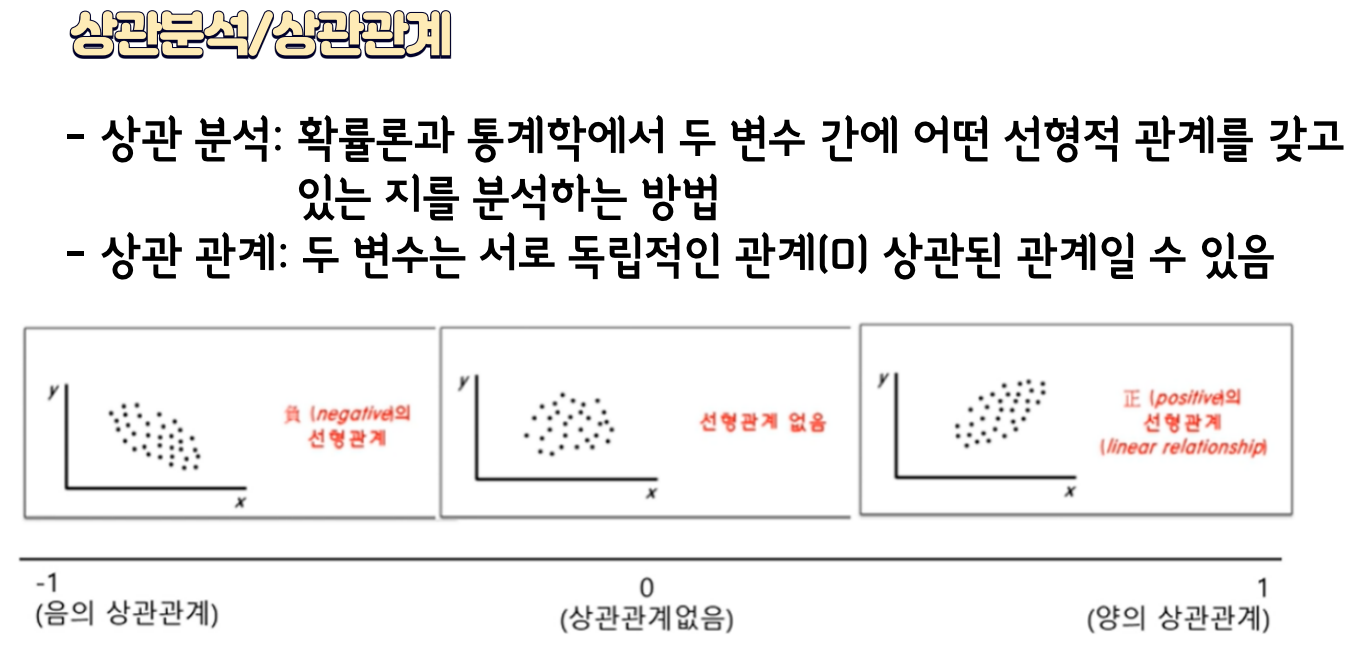

In [29]:
# 직원의 성과평가점수와 연봉의 상관계수 확인
hr_info[['PERFORMANCE_SCORE', 'SALARY']].corr()
# 성과평가저뭇가 높아질수록 연봉이 높아진다.

,PERFORMANCE_SCORE,SALARY
PERFORMANCE_SCORE,1.000000,0.609152
SALARY,0.609152,1.000000


In [30]:
# 전체데이터의 상관계수 확인
hr_info.corr(numeric_only=True)
# 절댓값으로 1에 가까울수록 상관관계가 높은 변수들이다.
# 정답에 영향을 많이 미치는 특성만을 학습시킬때 사용하면 유용하다.

,AGE,SERVICE_YEAR,PERFORMANCE_SCORE,SALARY,TRAINING_HOURS
AGE,1.000000,0.932563,0.582203,0.961699,0.575867
SERVICE_YEAR,0.932563,1.000000,0.492801,0.970875,0.559911
PERFORMANCE_SCORE,0.582203,0.492801,1.000000,0.609152,0.551200
SALARY,0.961699,0.970875,0.609152,1.000000,0.628931
TRAINING_HOURS,0.575867,0.559911,0.551200,0.628931,1.000000
